# Problem 1: Descriptive Statistics and Probability Theory: Real Data on CEO Compensation

First of all, as pre-requisite, importing useful libraries for data processing.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Next pre-requisite - loading data from ceo.xls file and display 5 first records.

In [32]:
ceo1999 = pd.read_excel('./Assignment_0/ceo.xls.')
ceo1999.head()


,salary,totcomp,tenure,age,sales,profits,assets,Unnamed: 7
0,3030,8138,7,61,161315.0,2956.0,257389.0,NaN
1,6050,14530,0,51,144416.0,22071.0,237545.0,NaN
2,3571,7433,11,63,139208.0,4430.0,49271.0,NaN
3,3300,13464,6,60,100697.0,6370.0,92630.0,NaN
4,10000,68285,18,63,100469.0,9296.0,355935.0,NaN


Now let's describe data to see some basic measurments.

In [33]:
ceo1999.describe()

,salary,totcomp,tenure,age,sales,profits,assets
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,2027.516779,8340.058166,7.834452,56.469799,11557.780984,700.460850,27054.290828
std,1722.566389,31571.803005,8.246721,6.806641,16168.368902,1542.538013,64659.043191
min,100.000000,100.000000,0.000000,34.000000,2896.400000,-2669.000000,717.800000
25%,1084.000000,1575.500000,2.000000,52.000000,4184.150000,108.450000,3856.950000
50%,1600.000000,2951.000000,5.000000,57.000000,6704.000000,333.100000,7810.800000
75%,2347.500000,6043.000000,10.000000,61.000000,12976.800000,738.000000,21105.550000
max,15250.000000,589101.000000,60.000000,84.000000,161315.000000,22071.000000,668641.000000


## (a)

### Calculation:
Computing common location measures for variable totcomp:

In [34]:
mu= np.mean(ceo1999['totcomp'])
print ("Mean = %G" % mu)

trim_mu = stats.trim_mean(ceo1999['totcomp'], 0.05)
print("5-percent-trimmed mean = %G" % trim_mu)

med = np.median(ceo1999['totcomp'])
print("Median = %G" % med)

# Lower quartile (Q1) 
Q1 = np.percentile(ceo1999['totcomp'], 25, interpolation = 'midpoint') 
# Upper quartile (Q3) 
Q3 = np.percentile(ceo1999['totcomp'], 75, interpolation = 'midpoint') 
print("Lower quartile = %G, Upper Quartile = %G" % (Q1, Q3))

Q1_5 = np.quantile(ceo1999['totcomp'], 0.05, interpolation = 'midpoint')
Q3_5 = np.quantile(ceo1999['totcomp'], 0.95, interpolation = 'midpoint')
print("Lower 5 percent Quantile = %G, Upper 5 percent Quantile = %G" % (Q1_5, Q3_5))

Mean = 8340.06
5-percent-trimmed mean = 4637.68
Median = 2951
Lower quartile = 1575.5, Upper Quartile = 6043
Lower 5 percent Quantile = 787.5, Upper 5 percent Quantile = 24523.5


### Explanation:
Mean indicates that CEO in average recieve 8340 as total compensation.

5%-trimmed mean is a mean value which is calculated across given data set by cutting 5% of data from left and right sides of distribution (outliers are removed). Since 5%-trimmed mean equals to 4638 and almost 2 times less than usual mean. It means there are some CEO which has very high values of total compensation compare to vast majority of CEOs. 

Median just indicate which value from data set sits in the middle of distribution. Since median equal to 2951 it means that 50% of CEO has total compensation less than 2951 and other 50% of CEO has Total Compensation higheer than 2951.

Lower quartile indicates that middle value for lower 50% of distribution equal to 1575.5. So first 25% of CEOs has total compensation between 100(min value) and 1575.5. That second 25% of CEOs has total companation between 1575.5 and 2951.
Upper quartile indicates that middle value for uper 50% of distribution equal to 6043. So third 25% of CEO has total compensation between 2951 and 6043. While last 25% of CEOs has total compensation between 6043 and 589101(max value).

Lower 5% quantile indicates that value 787.5 is on the upper edge of first 5% of dataset. It means that 5% of CEOs has Total Compensation between 100(min value) and 787.5. As opposite other 95% of CEOs have Total Compensation between 787.5 and 589101(max value).
Upper 5% quantile shows that value 24523.5 is on the lower edge of last 5% of dataset. It means that 5% of CEOs have Total Compensation which is between 24523.5 and 589101(max value), while other 95% has Total Compensation between 100(min value)and 24523.5.

## (b)

### Calculation:
Computing necessary data and plot empirical cumulative distribution function (ECDF).

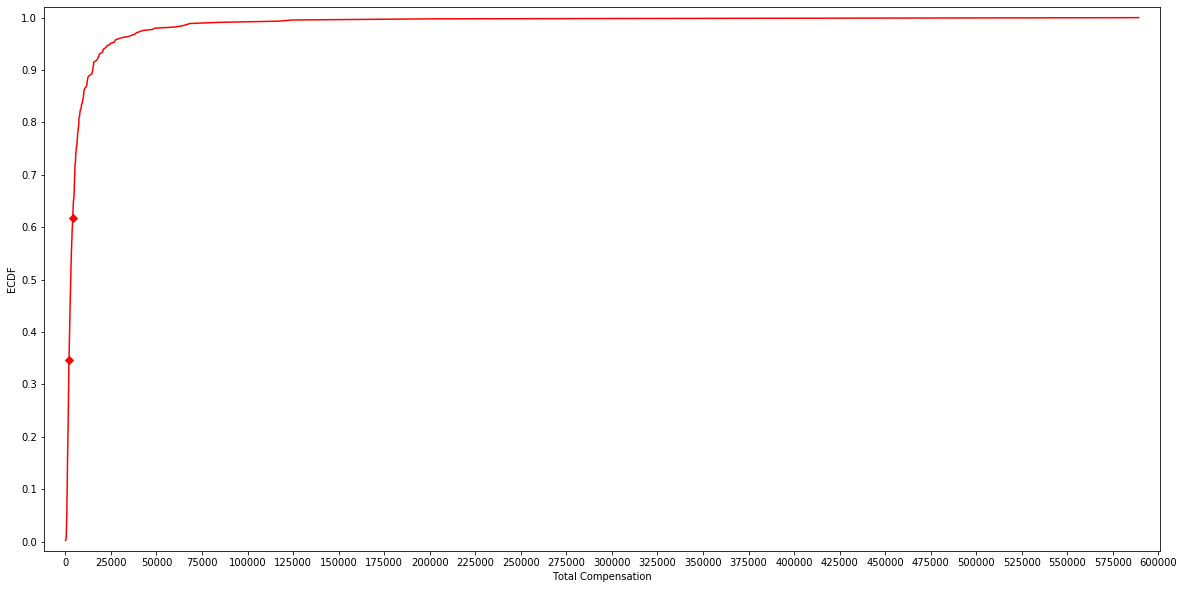

In [35]:
data = ceo1999['totcomp']
x = np.sort(data)
y = np.arange(1, len(x)+1)/len(x)

plt.figure(figsize=(20,10))
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 600001, step=25000))
markers_on = [154, 275]

plt.plot(x, y, '-rD', markevery=markers_on)
plt.xlabel('Total Compensation')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

### (i)

ECDF function with value 0.1 $F^{-1}(0.1)$ indicates maximum total Compensation for first 10% of CEOs aranged by Total Compensation amount. From this graphic it is clear that first 10% of CEOs have very little Total Compensation compare to values in the end of the curve.

ECDF function with value 0.9 $F^{-1}(0.9)$ indicates maximum Total Compensaton for first 90% of CEOs aranged by Total Compensation amount. From this graphic it is clear that first 90% of CEOs have improve in Total Compensation compare to first 10% - $F^{-1}(0.1)$, but still far behind other 10% in the end of the line. Maximum Total Compensation for 90% is less than 25000 as per graphic.

### (ii)
ECDF function for value 2000 - $F(2000) - indicate hom many CEOs have Total Compensation less or equal to 2000. From this graphic we could conclude that around 34% of CEOs have Total Compensation less or equal to 2000 (lower marker on the graph).

ECDF function for value 4000 - $F(4000) - indicate hom many CEOs have Total Compensation less or equal to 4000. From this graphic we could conclude that around 62% of CEOs have Total Compensation less or equal to 4000 (upper marker on the graph).

## (c)

### Calculation:
Building histogram and Box plot for given CEO dataset.

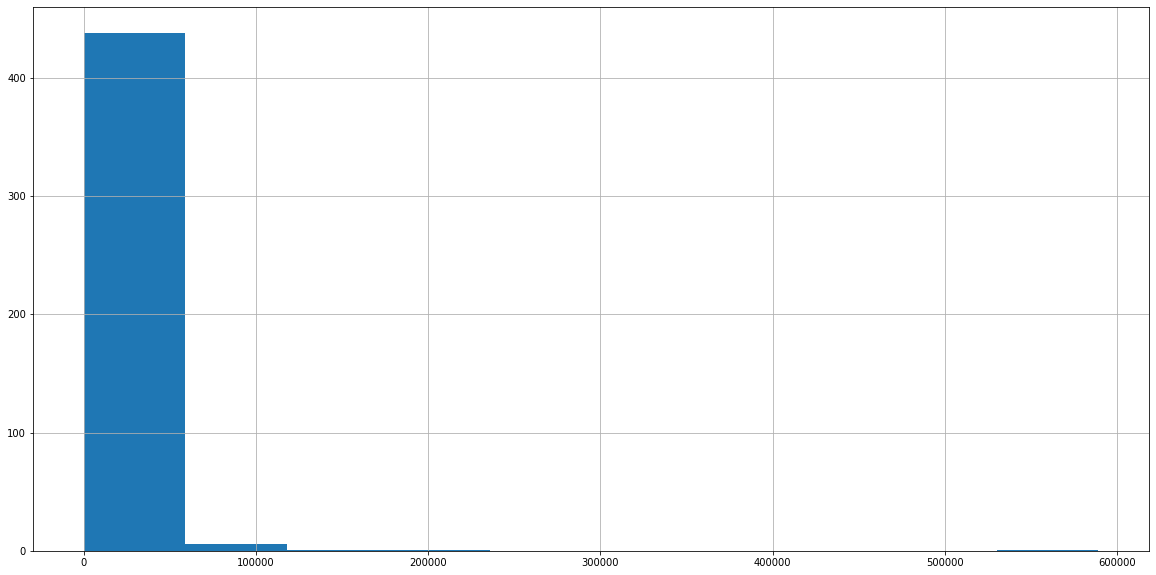

In [36]:
plt.figure(figsize=(20,10))
ceo1999['totcomp'].hist(density=False)
plt.show()

Examine histogram we could conclude that vast majority of data belongs to single bean. Distribution is highly asymetric. 400+ entries from total of 447 entries are in single bean, which confirms that there are outliers in data with relatively high Total Compensation. To visualize it's even better we could build Box plot.

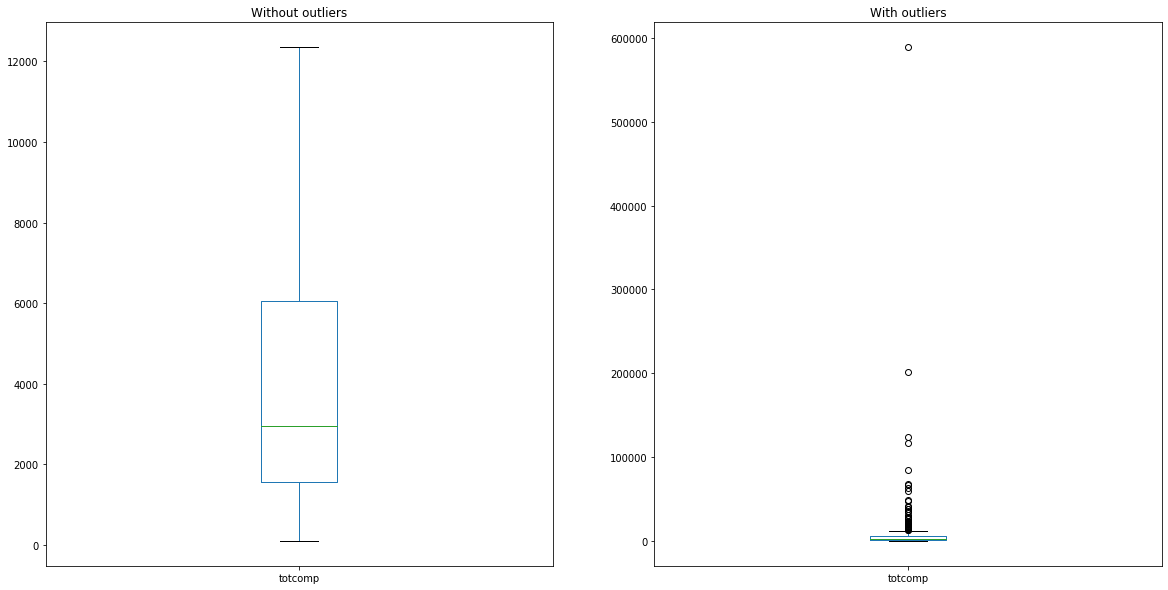

In [30]:
plt.figure(figsize=(20,10))

plt.subplot(121)
ceodf = ceo1999[['totcomp']]
ceodf.boxplot(grid=False, showfliers=False)
plt.title('Without outliers')

plt.subplot(122)
ceodf = ceo1999[['totcomp']]
ceodf.boxplot(grid=False, showfliers=True)
plt.title('With outliers')

plt.show()


From Box plot with and without outliers it becomes clear that there are few outliers in right part of distribution. Biggest part of data lies in interval [0; 12500] whether outliers has values up to almost 600000. Considering this location measures computed above are not appropriate due to outliers with very high Total Compensation. To confirm this let's compute  interquartile range (IQR) which is difference between upper and lower quartiles. Alternatively we could calculate Z-score to check how symetric our distribution is.

In [84]:
IQR = Q3 - Q1
data = ceo1999[['totcomp']]
#print(data < (Q1 - 1.5 * IQR))
#print(data > (Q3 + 1.5 * IQR))

z = np.abs(stats.zscore(data))
#threshold = 3
print(np.where(z > 3))
print(z[32][0])
print(z[44][0])
print(z[154][0])
print(z[191][0])

(array([ 32,  44, 154, 191], dtype=int64), array([0, 0, 0, 0], dtype=int64))
3.4404595270378717
18.415535358668524
6.138891068486217
3.6858579653188004
